In [43]:
import pandas as pd
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt

In [10]:
DATA_PATH = "../markup/data_female.csv"
INFO_PATH = "../markup/data_female_raiting.csv"
POOL_PATH = "../resourses"

SAMPLE_RATE = 16000
AUDIO_LENGTH = 10

In [11]:
data = pd.read_csv(DATA_PATH)
data = data[data["result"] != 0].reset_index(drop=True)

data

,author_first,voice_first,L_first,R_first,author_second,voice_second,L_second,R_second,result,validation
0,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,ca8310d799b2d05cddbaccd8b5643b5b,pool_31546723_14-02-2022_13-23-16/assignment_0...,742817,902817,1,True
1,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,417163f3e47e0898097d9db1203ece89,pool_31406799_14-02-2022_13-22-34/assignment_0...,622897,782897,1,True
2,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,bea83f439f3a5f391b39a058ec1a6b0e,pool_31406799_14-02-2022_13-22-34/assignment_0...,1639451,1799451,1,True
3,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,b0cdde51ed794209697bbb9f2b9697bf,pool_31546723_14-02-2022_13-23-16/assignment_0...,1157004,1317004,1,True
4,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,31f7071b2a859d86b6d05ab13dc9b004,pool_31546723_14-02-2022_13-23-16/assignment_0...,964620,1124620,1,True
...,...,...,...,...,...,...,...,...,...,...
2026,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,83ea422cd776bd51762c13ebad8bb826,pool_31546723_14-02-2022_13-23-16/assignment_0...,1525375,1685375,1,False
2027,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,7bea39239ec7d24a550a54c2ae891b2b,pool_31406799_14-02-2022_13-22-34/assignment_0...,152014,312014,1,False
2028,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,9ac5b2f3ac92a5d7f873e40a5b85c790,pool_31406799_14-02-2022_13-22-34/assignment_0...,67055,227055,1,False
2029,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,97dda75d5c65a8cba812fcff6da24186,pool_31546723_14-02-2022_13-23-16/assignment_0...,487944,647944,1,False


In [30]:
data_rows = []
for idx, row in data.iterrows():
    cur = row
    if cur["result"] < 0:
        cur["author_first"], cur["author_second"] = cur["author_second"], cur["author_first"]
        cur["voice_first"], cur["voice_second"] = cur["voice_second"], cur["voice_first"]
        cur["L_first"], cur["L_second"] = cur["L_second"], cur["L_first"]
        cur["R_first"], cur["R_second"] = cur["R_second"], cur["R_first"]
    data_rows.append(cur)
data_formated = pd.DataFrame(data_rows, columns=list(data.columns))
data_formated.drop(columns=["result"], inplace=True)

data_formated

,author_first,voice_first,L_first,R_first,author_second,voice_second,L_second,R_second,validation
0,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,ca8310d799b2d05cddbaccd8b5643b5b,pool_31546723_14-02-2022_13-23-16/assignment_0...,742817,902817,True
1,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,417163f3e47e0898097d9db1203ece89,pool_31406799_14-02-2022_13-22-34/assignment_0...,622897,782897,True
2,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,bea83f439f3a5f391b39a058ec1a6b0e,pool_31406799_14-02-2022_13-22-34/assignment_0...,1639451,1799451,True
3,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,b0cdde51ed794209697bbb9f2b9697bf,pool_31546723_14-02-2022_13-23-16/assignment_0...,1157004,1317004,True
4,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,31f7071b2a859d86b6d05ab13dc9b004,pool_31546723_14-02-2022_13-23-16/assignment_0...,964620,1124620,True
...,...,...,...,...,...,...,...,...,...
2026,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,83ea422cd776bd51762c13ebad8bb826,pool_31546723_14-02-2022_13-23-16/assignment_0...,1525375,1685375,False
2027,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,7bea39239ec7d24a550a54c2ae891b2b,pool_31406799_14-02-2022_13-22-34/assignment_0...,152014,312014,False
2028,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,9ac5b2f3ac92a5d7f873e40a5b85c790,pool_31406799_14-02-2022_13-22-34/assignment_0...,67055,227055,False
2029,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,97dda75d5c65a8cba812fcff6da24186,pool_31546723_14-02-2022_13-23-16/assignment_0...,487944,647944,False


In [31]:
from tqdm.notebook import tqdm 
import warnings

audiofiles = dict()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for idx, row in tqdm(list(data_formated.iterrows())):
        for number in ["first", "second"]:
            voice = row[f"voice_{number}"]
            if voice not in audiofiles:
                audiofiles[voice] = librosa.load(os.path.join(POOL_PATH, voice), sr=SAMPLE_RATE)[0]

  0%|          | 0/2031 [00:00<?, ?it/s]

In [107]:
def get_audio(audio_key):
    try: 
        return audiofiles[audio_key[0]]
    except KeyError:
        print("FileNotFoundError", audio_key[0])
        raise

def get_audio_LR(audio_key):
    try: 
        return get_audio(audio_key)[audio_key[1]: audio_key[2]]
    except KeyError:
        pass

In [33]:
data_train = pd.DataFrame(data_formated.loc[~data["validation"]], columns=data_formated.columns)
data_train = data_train.reset_index(drop=True)

data_test = pd.DataFrame(data_formated.loc[data["validation"]], columns=data_formated.columns).reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

print("Validation size %.3f, train size %.3f" % (len(data_test) / len(data), len(data_train) / len(data)))

Validation size 0.284, train size 0.716


In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import sys
sys.path.append('..')

In [79]:
import torch
import utils.feature_generators as fgen

from torch.utils.data import DataLoader
from collections import defaultdict
from utils.feature_usage import FeatureExtractor, SoundDataset
from utils.model_evaluation import Evaluator

In [37]:
temp_feature_generator = fgen.TempFeatureGenerator()
denoiser = fgen.Denoiser()

Using cache found in /Users/voidmax/.cache/torch/hub/facebookresearch_denoiser_main


In [116]:
# feature_extractor = FeatureExtractor(
#     get_audio_LR, transform=denoiser.denoise, 
#     feature_family=[
#         (temp_feature_generator, [
#             "temp_letters", "temp_words"
#         ]),
#         (fgen.SimpleFeatureGenerator(), [
#             "audio_zcr", "audio_rmse", "audio_entropy"
#         ]),
#         (fgen.SreFeatureGenerator(), [
#             "f0_mean", "f0_std", "f0_mean_der", "loudness_mean", "loudness_std", "loudness_mean_der"
#         ]),
#         (fgen.LibrosaFeatureGenerator(), [
#             "librosa_mfccs_mean", "librosa_rms_mean", "librosa_chroma_mean", "librosa_centroid_mean", 
#             "librosa_tonnetz_mean", "librosa_chroma_cens_mean", "librosa_spec_bw_mean", "librosa_flatness_mean", 
#         ])
#     ]
# )

feature_extractor = FeatureExtractor(
    get_audio_LR, transform=denoiser.denoise, 
    feature_family=[
        (temp_feature_generator, [
            "temp_letters", 
            # "temp_words"
        ]),
        (fgen.SimpleFeatureGenerator(), [
            "audio_rmse",
        ]),
        (fgen.SreFeatureGenerator(), [
            "f0_mean", "f0_std", "loudness_mean", "loudness_std",
        ]),
        (fgen.LibrosaFeatureGenerator(), [
            "librosa_tonnetz_std"
        ])
    ]
)

In [117]:
CROSS_VALIDATION_SIZE = 9

authors = set()
for idx, row in data_train.iterrows():
    authors.add(row["author_first"])
    authors.add(row["author_second"])
authors = list(authors)
authors = np.array(authors).reshape(CROSS_VALIDATION_SIZE, -1)

dataset_train = SoundDataset(data_train, feature_extractor, cache_path="cache/features_train.csv")
dataloader_train = DataLoader(dataset_train, batch_size=1, shuffle=True)
evaluator_train = Evaluator(dataset_train, INFO_PATH)

dataset_test = SoundDataset(data_test, feature_extractor, cache_path="cache/features_test.csv")
dataloader_test = DataLoader(dataset_test, batch_size=1, shuffle=True)
evaluator_test = Evaluator(dataset_test, INFO_PATH)

for d in tqdm(dataloader_train):
    pass
dataset_train.cache_save()

for d in tqdm(dataloader_test):
    pass
dataset_test.cache_save()

  0%|          | 0/1455 [00:00<?, ?it/s]

  0%|          | 0/576 [00:00<?, ?it/s]

In [118]:
cross_data_train = []
cross_dataset_train = []
cross_dataloader_train = []
cross_evaluator_train = []

for i in range(CROSS_VALIDATION_SIZE):
    current = data_train.copy()
    for author in authors[i]:
        current = current[(current["author_first"] != author) & (current["author_second"] != author)]
    current = current.reset_index(drop=True)

    cross_data_train.append(current)
    cross_dataset_train.append(SoundDataset(current, feature_extractor, cache_path="cache/features_train.csv"))
    cross_dataloader_train.append(DataLoader(cross_dataset_train[-1], batch_size=1, shuffle=True))
    cross_evaluator_train.append(Evaluator(cross_dataset_train[-1], INFO_PATH))

In [119]:
from sklearn.preprocessing import StandardScaler

df_train = []
for idx, f in enumerate(dataloader_train.dataset):
    df_train.append(f[0])
    df_train.append(f[1])
    if idx + 1 == len(dataloader_train.dataset):
        break

df_train = pd.DataFrame(df_train)
scaler = StandardScaler().fit(df_train)

In [120]:
tmp = pd.DataFrame(scaler.transform(df_train), columns=feature_extractor.get_feature_names())
tmp.corr()

,temp_letters,audio_rmse,f0_mean,f0_std,loudness_mean,loudness_std,librosa_tonnetz_std
temp_letters,1.000000,0.133962,0.069001,-0.068079,0.496075,-0.653212,0.098677
audio_rmse,0.133962,1.000000,0.382585,0.134575,0.729977,-0.058323,-0.056825
f0_mean,0.069001,0.382585,1.000000,0.481931,0.406110,-0.121295,0.269388
f0_std,-0.068079,0.134575,0.481931,1.000000,0.036420,0.064005,0.071642
loudness_mean,0.496075,0.729977,0.406110,0.036420,1.000000,-0.597414,0.109547
loudness_std,-0.653212,-0.058323,-0.121295,0.064005,-0.597414,1.000000,-0.157001
librosa_tonnetz_std,0.098677,-0.056825,0.269388,0.071642,0.109547,-0.157001,1.000000


In [121]:
import torch 
import torch.nn as nn

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

def conv_size_out(size, kernel_size, stride):
    return (size - (kernel_size - 1) - 1) // stride  + 1

class SmallModel(nn.Module):
    def __init__(self, W):
        super().__init__()

        self.MLP = nn.Sequential(
            nn.Linear(W, 8, bias=True),
            nn.LeakyReLU(0.1),
            nn.Linear(8, 1, bias=False),
        )
        
    def forward(self, input):
        if len(input.shape) == 1:
            input = input.reshape(1, -1)
        return self.MLP(torch.Tensor(scaler.transform(input))).view(-1)

    def compare(self, data):
        L, R = self(d[0]), self(d[1])
        values = torch.stack([L, R], dim=-1)
        values = nn.functional.softmax(values, dim=-1)
        return values

In [122]:
def plot_history(cross_history, label):
    cross_history = np.array(cross_history)
    mean, std = cross_history.mean(axis=0), cross_history.std(axis=0)
    plt.plot(mean, label=label, linewidth=2)
    plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=.25)

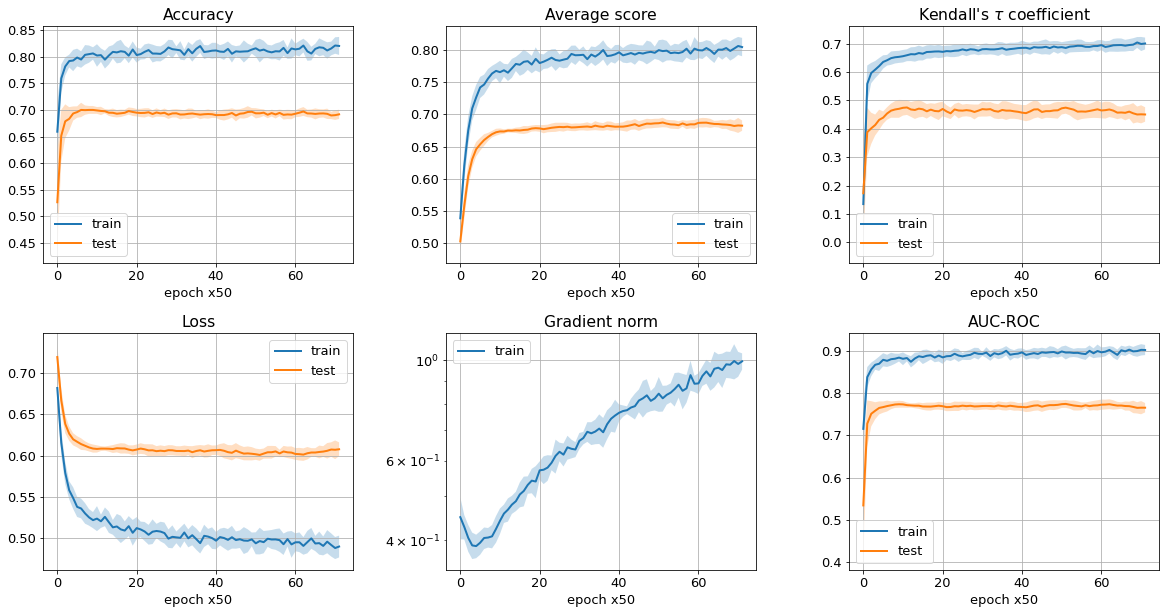

  0%|          | 0/9 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [123]:
from IPython.display import clear_output
from sklearn.metrics import roc_auc_score

USING_CROSS_VALIDATION_SIZE = CROSS_VALIDATION_SIZE

reg_coef = 0.01
model = [SmallModel(W=len(dataset_train[0][0])).to(device) for i in range(USING_CROSS_VALIDATION_SIZE)]
optimizer = [torch.optim.Adam(model[i].parameters(), lr=3e-4) for i in range(USING_CROSS_VALIDATION_SIZE)]

cross_history_train = defaultdict(lambda: [[] for i in range(USING_CROSS_VALIDATION_SIZE)])
cross_history_test = defaultdict(lambda: [[] for i in range(USING_CROSS_VALIDATION_SIZE)])

times = 50
xlabel = f"epoch x{times}"

for epoch in range(500):
    for i in tqdm(range(USING_CROSS_VALIDATION_SIZE)):
        combined = defaultdict(list)
        with torch.no_grad():
            evaluator_test.evaluate(lambda x: model[i](x).item())
            combined["kendall_coefficients"].append(evaluator_test.kendall_coefficients())
            model[i].eval()
            y_score = []
            y_true = []
            for d in dataloader_test:
                values = model[i].compare(d)
                y_score.append(values[0][0].item())
                y_true.append(1)
                y_score.append(values[0][1].item())
                y_true.append(0)

                loss = nn.functional.cross_entropy(values, torch.zeros(values.shape[0], dtype=int))
                # loss += reg_coef * torch.abs(list(model[i].parameters())[0]).sum()
                loss += reg_coef * ((list(model[i].parameters())[0])**2).sum()

                combined["loss"].append(loss.item())
                combined["average_score"].append(values[:, 0].mean().item())
                combined["accuracy"].append(((values[:, 0] > 0.5).float().mean() + 0.5 * (values[:, 0] == 0.5).float().mean()).item())
            
            combined["roc-auc"].append(roc_auc_score(y_true, y_score))
            model[i].train()
        for key, value in combined.items():
            cross_history_test[key][i].append(np.mean(value))

        combined = defaultdict(list)
        cross_evaluator_train[i].evaluate(lambda x: model[i](x).item())
        combined["kendall_coefficients"].append(cross_evaluator_train[i].kendall_coefficients())
        for t in range(times):
            y_score = []
            y_true = []
            for d in cross_dataset_train[i].generator():
                y_score.append(values[0][0].item())
                y_true.append(1)
                y_score.append(values[0][1].item())
                y_true.append(0)

                values = model[i].compare(d)
                loss = nn.functional.cross_entropy(values, torch.zeros(values.shape[0], dtype=int))
                # loss += reg_coef * torch.abs(list(model[i].parameters())[0]).sum()
                loss += reg_coef * ((list(model[i].parameters())[0])**2).sum()

                combined["loss"].append(loss.item())
                combined["accuracy"].append(((values[:, 0] > 0.5).float().mean() + 0.5 * (values[:, 0] == 0.5).float().mean()).item())
                combined["average_score"].append(values[:, 0].mean().item())

                optimizer[i].zero_grad()
                loss.backward()
                combined["grad_norm"].append(torch.nn.utils.clip_grad_norm_(model[i].parameters(), 0.5).item())
                optimizer[i].step()

            combined["roc-auc"].append(roc_auc_score(y_true, y_score))
        for key, value in combined.items():
            cross_history_train[key][i].append(np.mean(value))
    
    clear_output(True)
    plt.figure(figsize=[20, 10])
    plt.rc('font', size=13)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    plt.subplot(2, 3, 4)
    plot_history(cross_history_train["loss"], label="train")
    plot_history(cross_history_test["loss"], label="test")
    plt.title("Loss")
    plt.grid()
    plt.xlabel(xlabel)
    plt.legend()
    
    plt.subplot(2, 3, 3)
    plot_history(cross_history_train["kendall_coefficients"], label="train")
    plot_history(cross_history_test["kendall_coefficients"], label="test")
    plt.title("Kendall's $\\tau$ coefficient")
    plt.grid()
    plt.xlabel(xlabel)
    plt.legend()

    plt.subplot(2, 3, 1)
    plot_history(cross_history_train["accuracy"], label="train")
    plot_history(cross_history_test["accuracy"], label="test")
    plt.title("Accuracy")
    plt.grid()
    plt.xlabel(xlabel)
    plt.legend()

    plt.subplot(2, 3, 5)
    plot_history(cross_history_train["grad_norm"], label="train")
    plt.title("Gradient norm")
    plt.yscale("log")
    plt.grid()
    plt.xlabel(xlabel)
    plt.legend()

    plt.subplot(2, 3, 2)
    plot_history(cross_history_train["average_score"], label="train")
    plot_history(cross_history_test["average_score"], label="test")
    plt.title("Average score")
    plt.grid()
    plt.xlabel(xlabel)
    plt.legend()

    plt.subplot(2, 3, 6)
    plot_history(cross_history_train["roc-auc"], label="train")
    plot_history(cross_history_test["roc-auc"], label="test")
    plt.title("AUC-ROC")
    plt.grid()
    plt.xlabel(xlabel)
    plt.legend()

    plt.show()
    # break

In [100]:
imp = defaultdict(list)

for t in range(USING_CROSS_VALIDATION_SIZE):
    for name, value in zip(feature_extractor.get_feature_names(), list(model[t].parameters())[0].T.detach()):
        for v in value:
            imp[name].append(v)

for name, value in imp.items():
    value = np.array(value)
    print("{:<30}".format(name), "mean = %.5f" % np.abs(value).mean(), "\tstd = %.5f" % np.abs(value).std())

temp_letters                   mean = 0.04542 	std = 0.04051
audio_rmse                     mean = 0.07327 	std = 0.05344
f0_mean                        mean = 0.03029 	std = 0.02376
f0_std                         mean = 0.05400 	std = 0.04402
loudness_mean                  mean = 0.07552 	std = 0.03294
loudness_std                   mean = 0.07360 	std = 0.05797
librosa_chroma_cens_mean       mean = 0.10664 	std = 0.06060


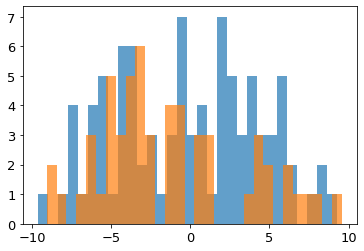

In [106]:
res = []
for d in dataset_train._cache.values():
    res.append(np.mean([model[i](d).detach().item() for i in range(USING_CROSS_VALIDATION_SIZE)]))
plt.hist(res, bins=30, label="train", alpha=0.7)

res = []
for d in dataset_test._cache.values():
    res.append(np.mean([model[i](d).detach().item() for i in range(USING_CROSS_VALIDATION_SIZE)]))
plt.hist(res, bins=30, label="test", alpha=0.7)
plt.show()